In [1]:
import pandas as pd 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head()

Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0   56  27.577099           88.0        108.0       92      171         75   
1   69  26.233744           88.0        252.0      102      179         71   
2   46  29.646620          152.0        141.0       89      198         90   
3   32  30.619597          106.0        273.0      159      222         64   
4   60  16.794395           96.0        172.0      173       30         99   

   Smoker PhysicalActivity  SleepTime  MedicalHistoryScore IncomeLevel  \
0       0           Medium          9                    5        High   
1       0             High          9                    3        High   
2       1              Low          5                    5      Medium   
3       1           Medium          7                    0      Medium   
4       1              Low          7                    3        High   

  StressLevel HealthIns    Disease  
0         Low        No  Disease_B  
1      Medium       Yes  Disease_A  
2      Medium        No  Disease_C  
3        High        No  Disease_C  
4      Medium        No  Disease_B

In [4]:
df.shape

(5000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

In [6]:
df.describe()

Age          BMI  BloodPressure  Cholesterol      Glucose  \
count  5000.000000  4750.000000    4750.000000  4750.000000  5000.000000   
mean     48.805600    27.332873     129.749053   199.611158   137.440600   
std      17.906991     7.190172      28.671508    58.173633    47.448072   
min      18.000000    15.000291      80.000000   100.000000    70.000000   
25%      34.000000    21.049709     105.000000   149.000000   103.000000   
50%      49.000000    27.218082     130.000000   201.000000   136.000000   
75%      64.000000    33.530189     155.000000   250.000000   167.000000   
max      79.000000    39.988943     179.000000   299.000000   582.000000   

           Insulin    HeartRate       Smoker    SleepTime  MedicalHistoryScore  
count  5000.000000  5000.000000  5000.000000  5000.000000          5000.000000  
mean    146.573200    80.342000     0.510400     7.482200             4.485400  
std      82.623127    13.914919     0.499942     2.281562             2.852405  
min      15.000000    60.000000     0.000000     4.000000             0.000000  
25%      78.000000    70.000000     0.000000     5.000000             2.000000  
50%     144.000000    80.000000     1.000000     7.000000             4.000000  
75%     213.000000    89.000000     1.000000     9.000000             7.000000  
max     744.000000   198.000000     1.000000    11.000000             9.000000

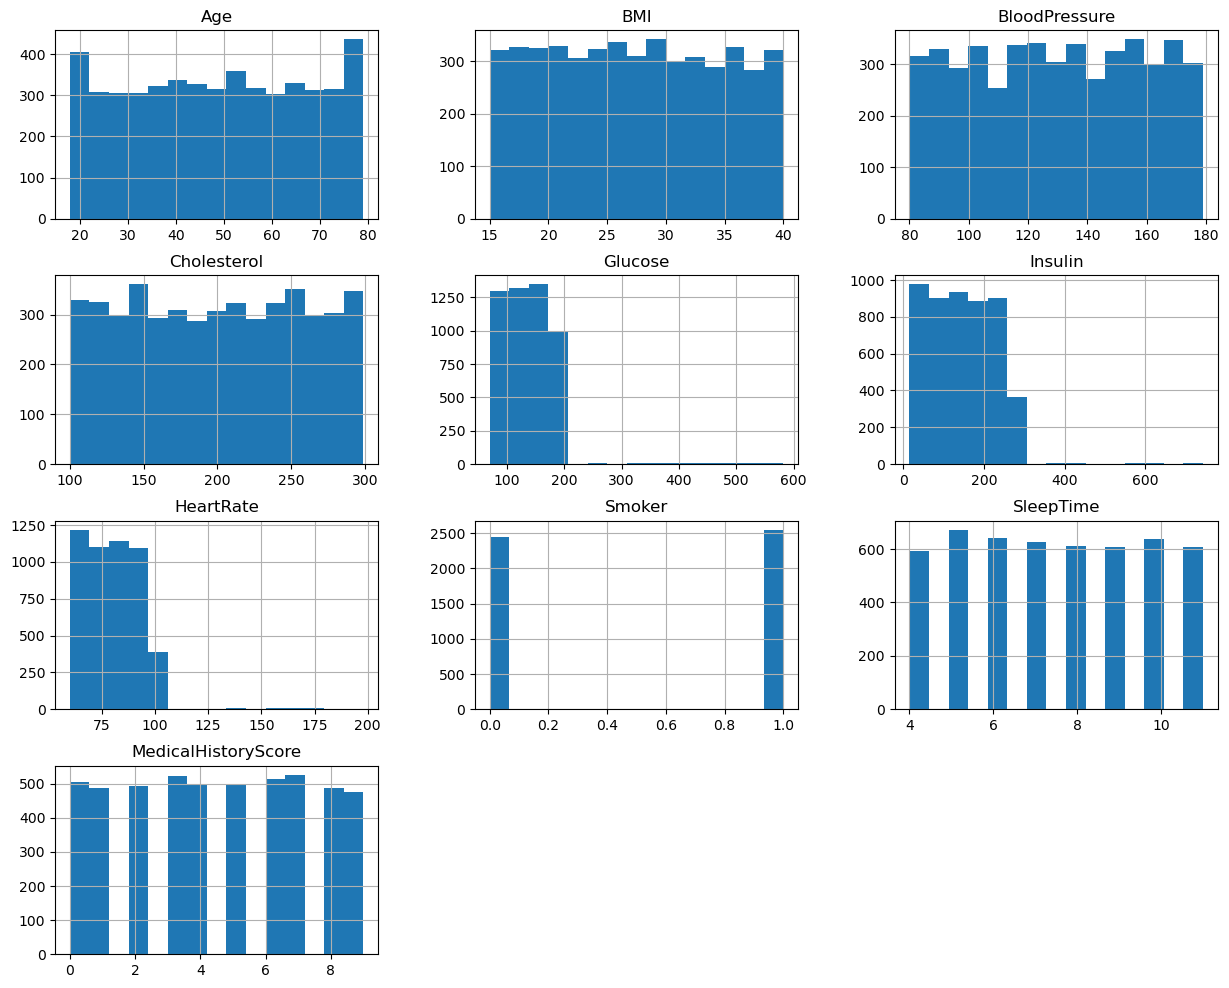

In [7]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Distribution")
plt.show()

smoker, sleepTime and MEdical History score are discrete

In [8]:
df.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

estos son los porcentajes que falta de los 5000 registros

In [9]:
df.isnull().mean() * 100

Age                     0.00
BMI                     5.00
BloodPressure           5.00
Cholesterol             5.00
Glucose                 0.00
Insulin                 0.00
HeartRate               0.00
Smoker                  0.00
PhysicalActivity        0.00
SleepTime               0.00
MedicalHistoryScore     0.00
IncomeLevel             0.00
StressLevel             0.00
HealthIns               0.00
Disease                25.16
dtype: float64

eliminar filas si tienen todos sus datos vacios, comparamos con el shape de la data original y es la misma lo que quiere decir que no hay datos faltantes en toda una fila

In [10]:
drop=df.dropna(axis=0,how="all")
drop.shape

(5000, 15)

usaremos la funcion missingno para entender la data faltante

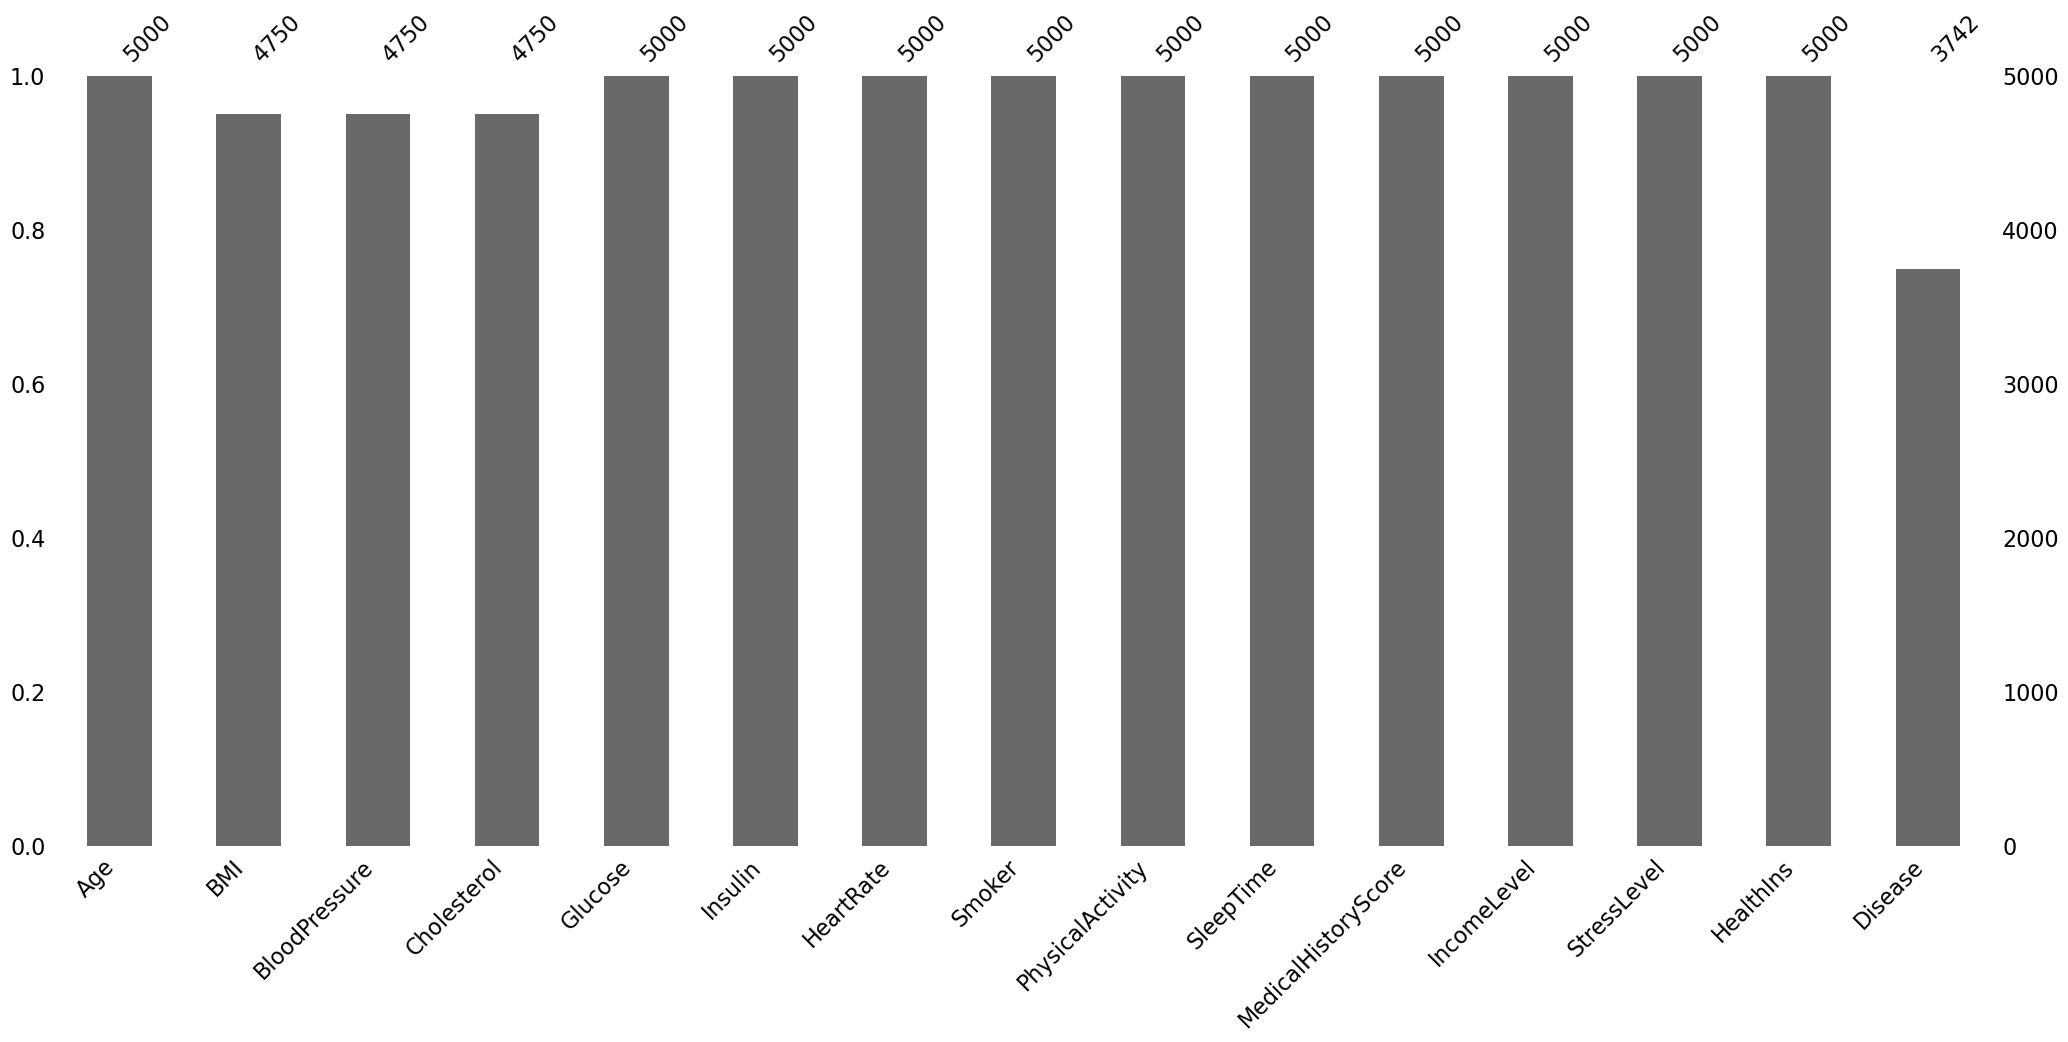

In [11]:
import missingno as msno
ax = msno.bar(df)

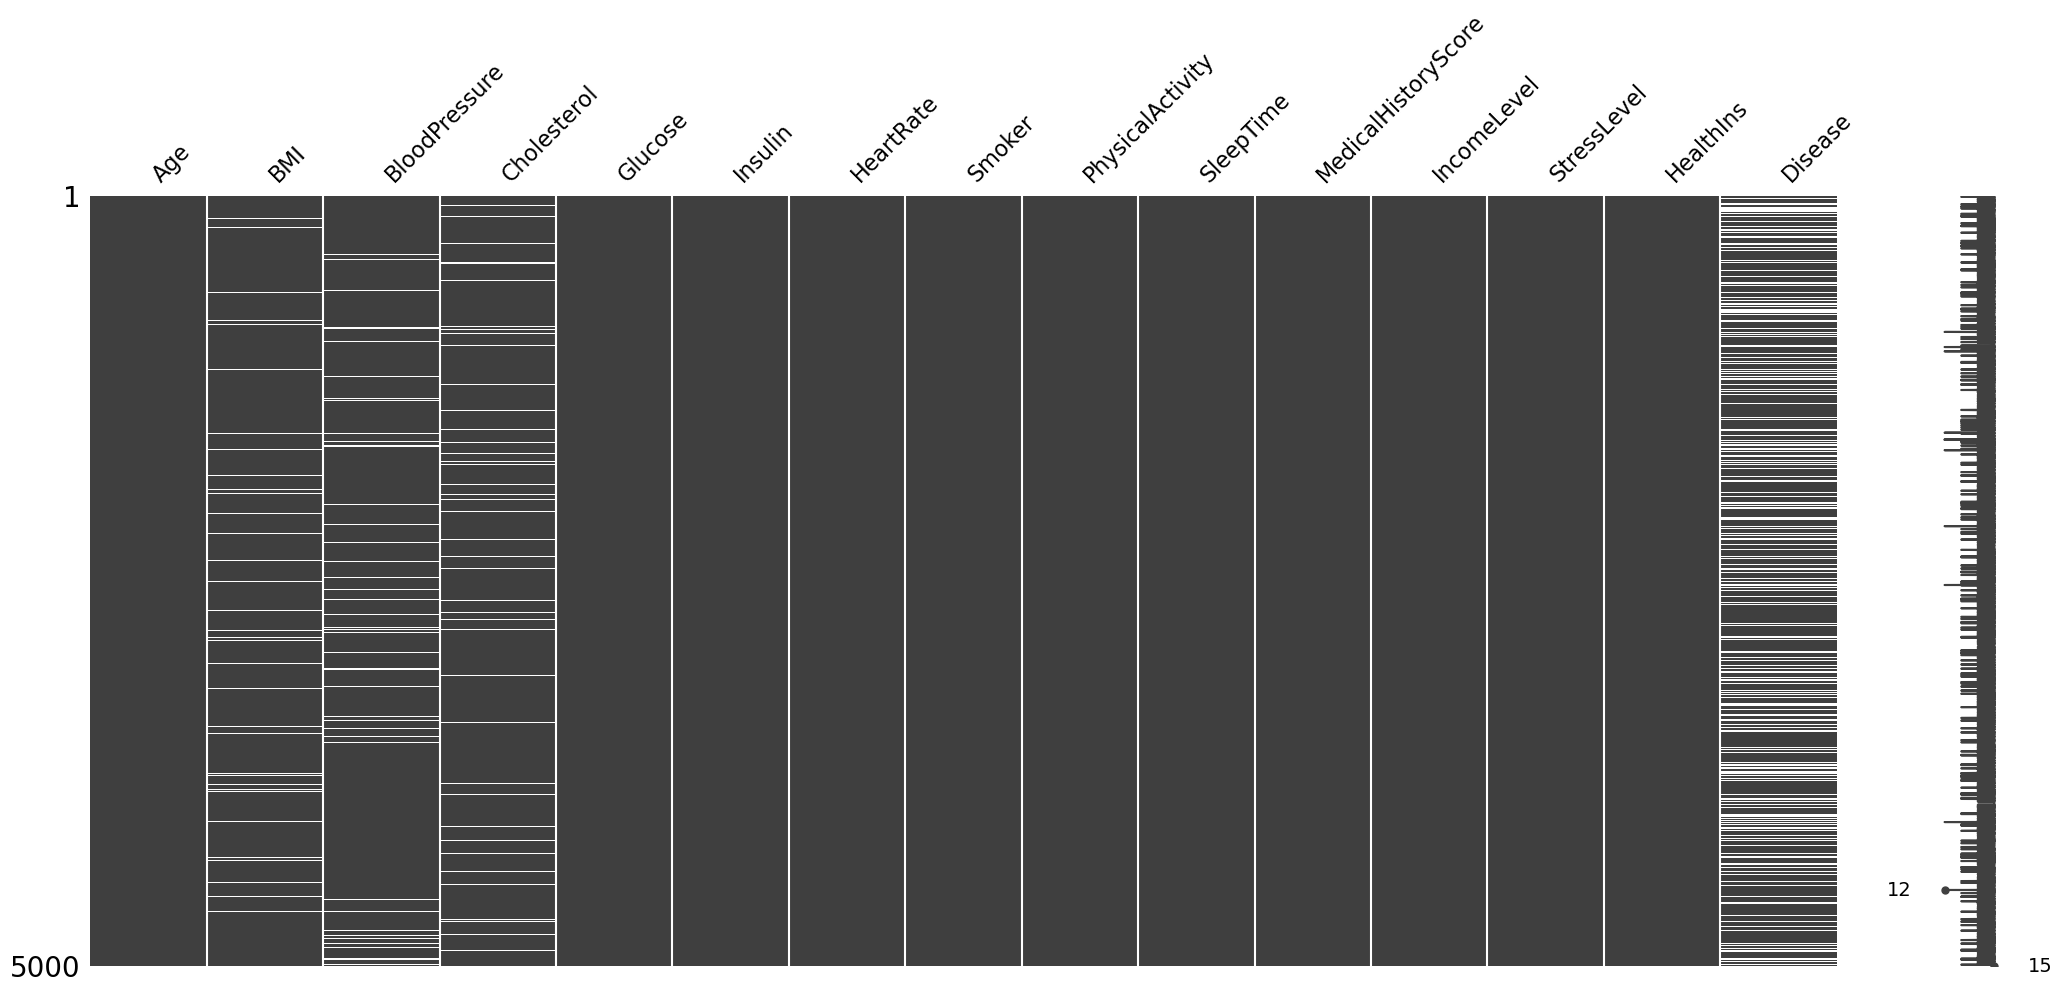

In [12]:
ax = msno.matrix(df)

no hay ningun patron que se obeserve para determinar porque esta faltando data

BMI

<Axes: >

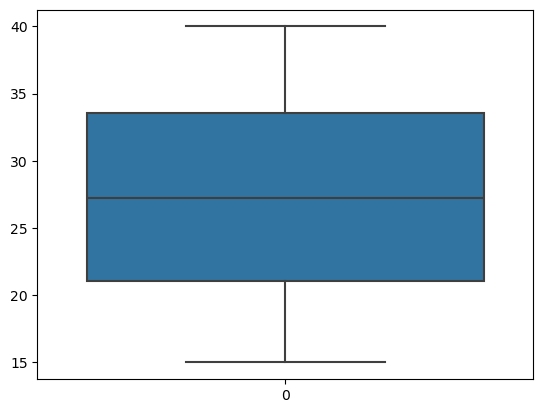

In [13]:
sns.boxplot(df["BMI"])

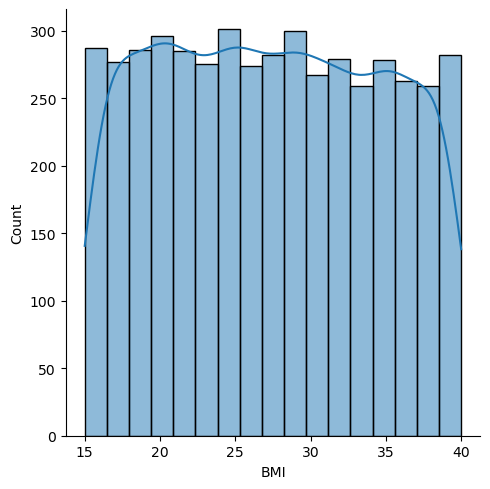

In [14]:
sns.displot(df["BMI"],kde=True)

In [15]:
mean = df["BMI"].mean()
median = df["BMI"].median()
mode = df["BMI"].mode()[0]
mean, median, mode

(27.3328732952, 27.21808199, 15.00029087)

In [16]:
BMI_mean=df["BMI"].fillna(mean)
BMI_median=df["BMI"].fillna(median)
BMI_mode=df["BMI"].fillna(mode)

In [17]:
inter= df["BMI"].interpolate(method='linear', direction = 'forward')

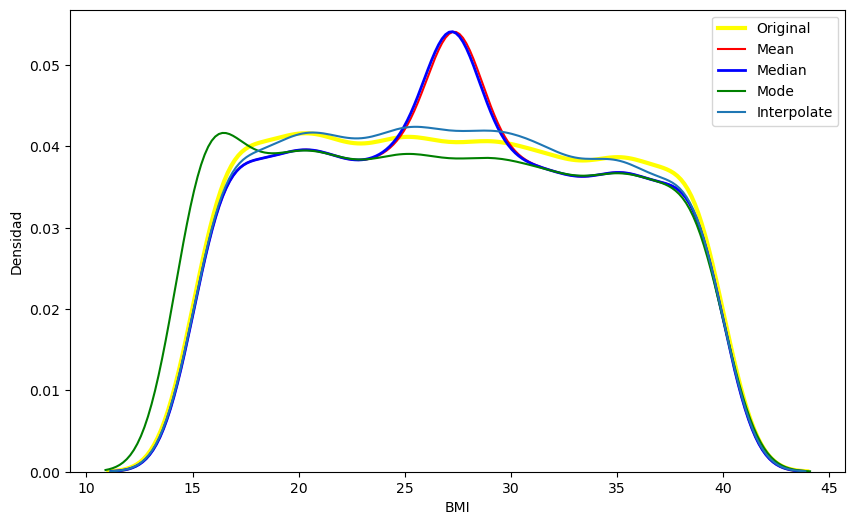

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x = df["BMI"], label="Original", color = "yellow",linewidth=3)
sns.kdeplot(x = BMI_mean, label="Mean",color = "red")
sns.kdeplot(x = BMI_median, label="Median", color = "blue",linewidth=2)
sns.kdeplot(x = BMI_mode, label="Mode", color = "green")
sns.kdeplot(x = inter, label="Interpolate")
plt.ylabel('Densidad')
plt.legend()
plt.show()

en la grafica se puede ver que con la moda es muy parecida, sin embargo la moda se aleja mucho a la mean, por lo tanto los datos se cargan mas hacia el lado izquierdo. 

In [19]:
inter.describe(), df["BMI"].describe()

(count    5000.000000
 mean       27.320139
 std         7.098099
 min        15.000291
 25%        21.193732
 50%        27.191454
 75%        33.367192
 max        39.988943
 Name: BMI, dtype: float64,
 count    4750.000000
 mean       27.332873
 std         7.190172
 min        15.000291
 25%        21.049709
 50%        27.218082
 75%        33.530189
 max        39.988943
 Name: BMI, dtype: float64)

revisamos las xxx estadisticas para observar si hay muchas diferencia pero ninguno tiene un cambio relevante

In [20]:
df["BMI"]=inter

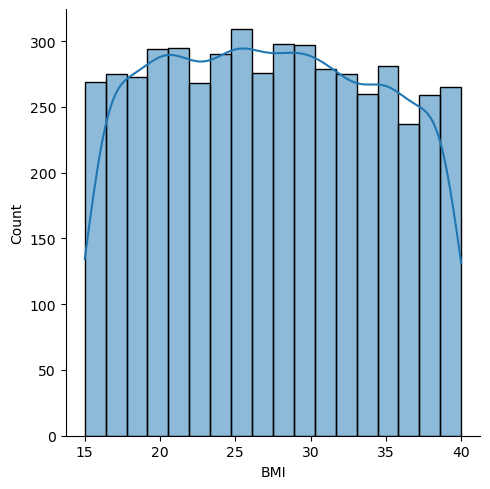

In [21]:
sns.displot(df["BMI"],kde=True)

# BloodPressure

<Axes: >

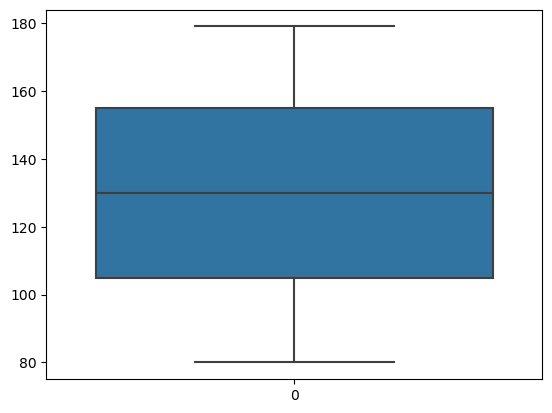

In [22]:
sns.boxplot(df["BloodPressure"])

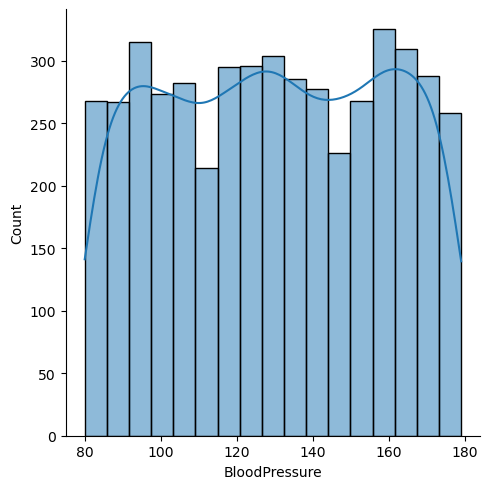

In [23]:
sns.displot(df["BloodPressure"],kde=True)

In [24]:
mean = df["BloodPressure"].mean()
median = df["BloodPressure"].median()
mode = df["BloodPressure"].mode()[0]
mean, median, mode

(129.74905263157893, 130.0, 127.0)

In [25]:
Blood_mean=df["BloodPressure"].fillna(mean)
Blood_median=df["BloodPressure"].fillna(median)
Blood_mode=df["BloodPressure"].fillna(mode)
Blood_inter= df["BloodPressure"].interpolate(method='linear', direction = 'forward')

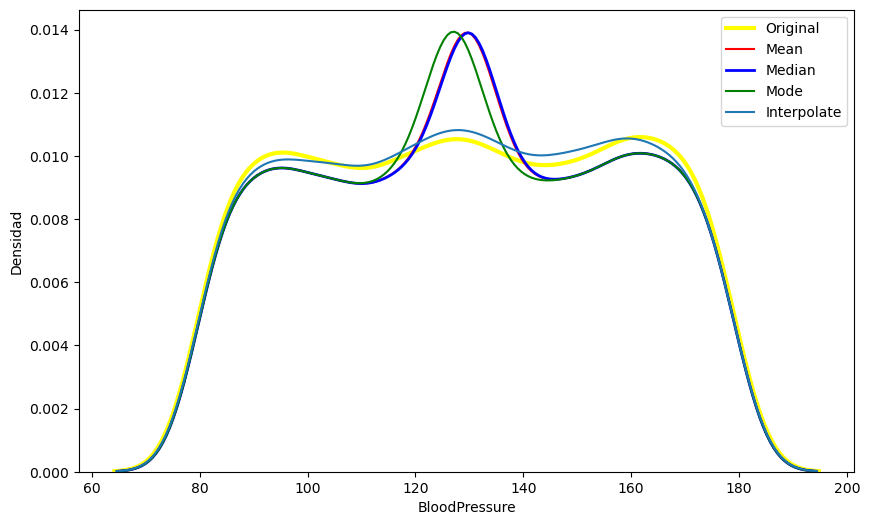

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x = df["BloodPressure"], label="Original", color = "yellow",linewidth=3)
sns.kdeplot(x = Blood_mean, label="Mean",color = "red")
sns.kdeplot(x = Blood_median, label="Median", color = "blue",linewidth=2)
sns.kdeplot(x = Blood_mode, label="Mode", color = "green")
sns.kdeplot(x = Blood_inter, label="Interpolate")
plt.ylabel('Densidad')
plt.legend()
plt.show()

los datos estan balanceados asi que aplicar la media, mediana o la moda para remplazar los datos vacios haran que incremente la distribucion en el medio

In [27]:
Blood_inter.describe(), df["BloodPressure"].describe()

(count    5000.000000
 mean      129.772600
 std        28.332091
 min        80.000000
 25%       105.000000
 50%       130.000000
 75%       155.000000
 max       179.000000
 Name: BloodPressure, dtype: float64,
 count    4750.000000
 mean      129.749053
 std        28.671508
 min        80.000000
 25%       105.000000
 50%       130.000000
 75%       155.000000
 max       179.000000
 Name: BloodPressure, dtype: float64)

In [28]:
df["BloodPressure"]=Blood_inter

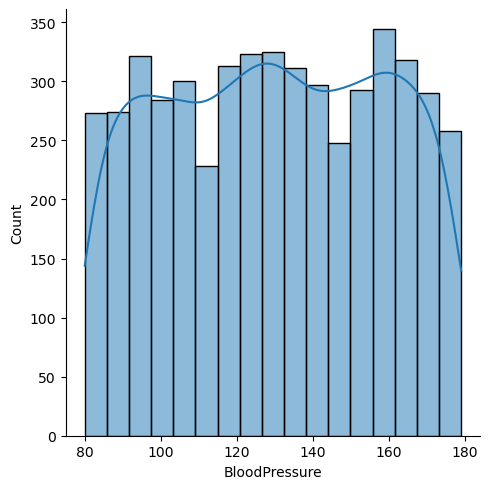

In [29]:
sns.displot(df["BloodPressure"],kde=True)

# Cholesterol             

<Axes: >

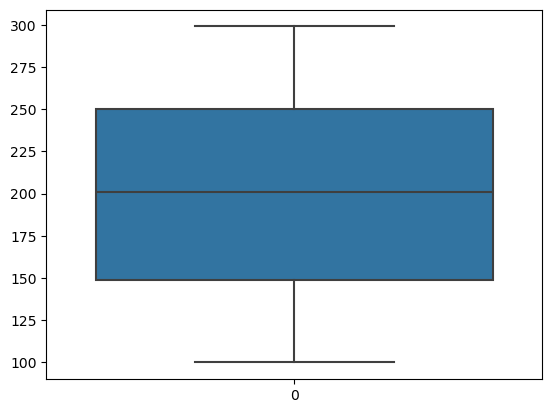

In [30]:
sns.boxplot(df["Cholesterol"])

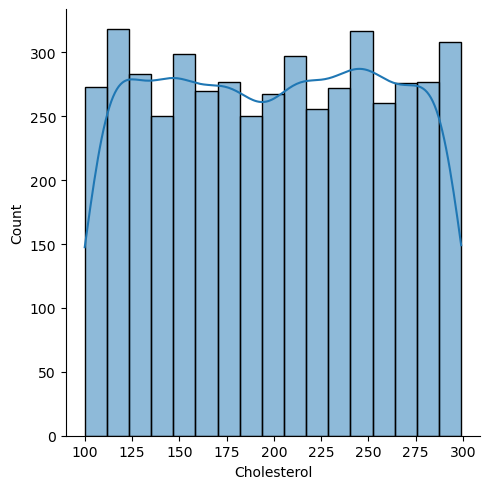

In [31]:
sns.displot(df["Cholesterol"],kde=True)

In [32]:
mean = df["Cholesterol"].mean()
median = df["Cholesterol"].median()
mode = df["Cholesterol"].mode()[0]
mean, median, mode

(199.61115789473683, 201.0, 114.0)

In [33]:
Cho_mean=df["Cholesterol"].fillna(mean)
Cho_median=df["Cholesterol"].fillna(median)
Cho_mode=df["Cholesterol"].fillna(mode)
Cho_inter= df["Cholesterol"].interpolate(method='linear', direction = 'forward')

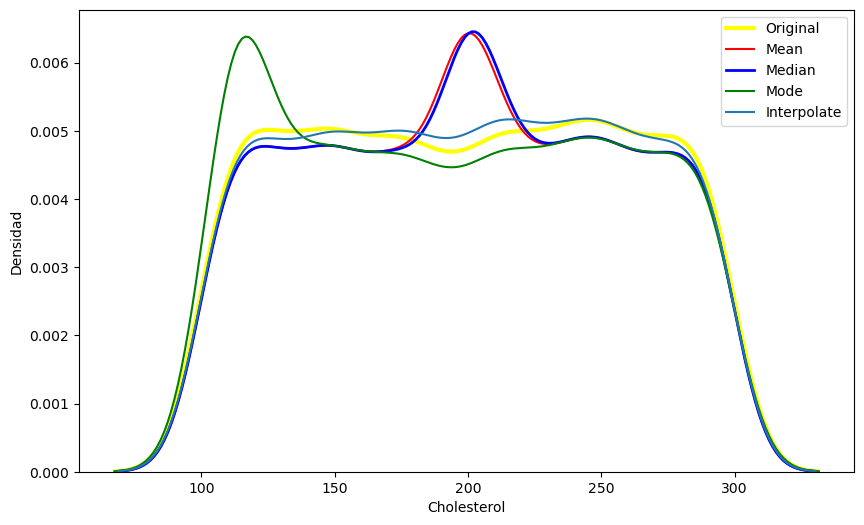

In [34]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x = df["Cholesterol"], label="Original", color = "yellow",linewidth=3)
sns.kdeplot(x = Cho_mean, label="Mean",color = "red")
sns.kdeplot(x = Cho_median, label="Median", color = "blue",linewidth=2)
sns.kdeplot(x = Cho_mode, label="Mode", color = "green")
sns.kdeplot(x = Cho_inter, label="Interpolate")
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [35]:
Cho_inter.describe(), df["Cholesterol"].describe()

(count    5000.000000
 mean      199.750800
 std        57.494661
 min       100.000000
 25%       150.000000
 50%       201.000000
 75%       249.000000
 max       299.000000
 Name: Cholesterol, dtype: float64,
 count    4750.000000
 mean      199.611158
 std        58.173633
 min       100.000000
 25%       149.000000
 50%       201.000000
 75%       250.000000
 max       299.000000
 Name: Cholesterol, dtype: float64)

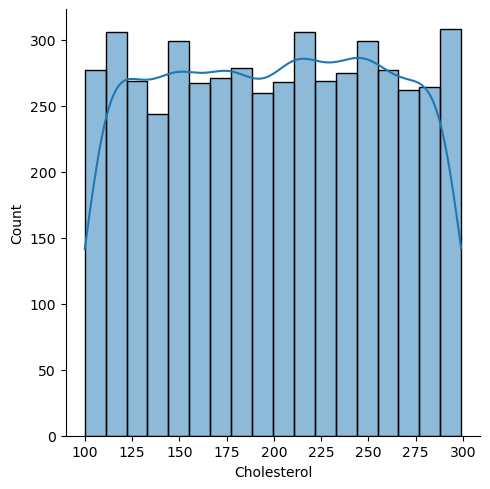

In [36]:
df["Cholesterol"]=Cho_inter
sns.displot(df["Cholesterol"],kde=True)

In [37]:
df.isnull().sum()

Age                       0
BMI                       0
BloodPressure             0
Cholesterol               0
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

Disease: en el diccionario dice que los datos estan clasificados in Type of disease diagnosed in the patient, if any. Values: 'Disease_A', 'Disease_B', 'Disease_C', 'None'.
Asi que los valores nulos que aparecen en realidad esque es otra clasificacion que no es ninguna Disease A,B o C.

In [38]:
df["Disease"].unique()

array(['Disease_B', 'Disease_A', 'Disease_C', nan], dtype=object)

In [39]:
df["Disease"].fillna("Other")

0       Disease_B
1       Disease_A
2       Disease_C
3       Disease_C
4       Disease_B
          ...    
4995    Disease_B
4996    Disease_C
4997    Disease_C
4998        Other
4999    Disease_C
Name: Disease, Length: 5000, dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df["Disease"]=le.fit_transform(df["Disease"])

 Disease_A= 0, Disease_B= 1, Disease_C= 2, Other= 3

In [42]:
df["Disease"]

0       1
1       0
2       2
3       2
4       1
       ..
4995    1
4996    2
4997    2
4998    3
4999    2
Name: Disease, Length: 5000, dtype: int32

<Axes: xlabel='Disease', ylabel='count'>

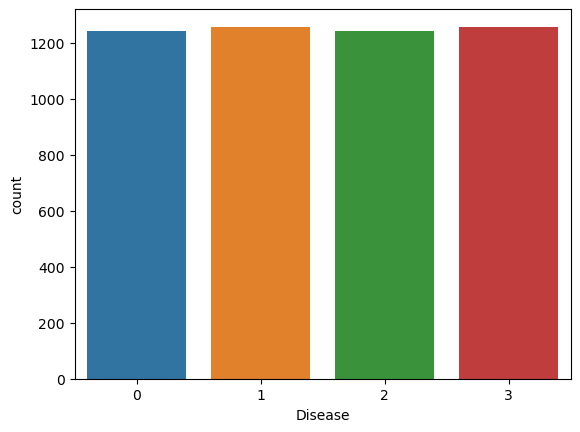

In [43]:
sns.countplot(x="Disease",data = df)

los datos estan balanceados

In [44]:
df.dtypes

Age                      int64
BMI                    float64
BloodPressure          float64
Cholesterol            float64
Glucose                  int64
Insulin                  int64
HeartRate                int64
Smoker                   int64
PhysicalActivity        object
SleepTime                int64
MedicalHistoryScore      int64
IncomeLevel             object
StressLevel             object
HealthIns               object
Disease                  int32
dtype: object

In [45]:
print("\n Physical Activity:",df["PhysicalActivity"].unique())
print("\n Income Level:",df["IncomeLevel"].unique())
print("\n Stress Level:",df["StressLevel"].unique())
print("\n HealthIns:",df["HealthIns"].unique())


 Physical Activity: ['Medium' 'High' 'Low']

 Income Level: ['High' 'Medium' 'Low']

 Stress Level: ['Low' 'Medium' 'High']

 HealthIns: ['No' 'Yes']


In [46]:
df["PhysicalActivity"]=le.fit_transform(df["PhysicalActivity"])
df["IncomeLevel"]=le.fit_transform(df["IncomeLevel"])
df["StressLevel"]=le.fit_transform(df["StressLevel"])
df["HealthIns"]=le.fit_transform(df["HealthIns"])

In [47]:
print("\n Physical Activity:",df["PhysicalActivity"].unique())
print("\n Income Level:",df["IncomeLevel"].unique())
print("\n Stress Level:",df["StressLevel"].unique())
print("\n HealthIns:",df["HealthIns"].unique())


 Physical Activity: [2 0 1]

 Income Level: [0 2 1]

 Stress Level: [1 2 0]

 HealthIns: [0 1]


In [48]:
df.dtypes

Age                      int64
BMI                    float64
BloodPressure          float64
Cholesterol            float64
Glucose                  int64
Insulin                  int64
HeartRate                int64
Smoker                   int64
PhysicalActivity         int32
SleepTime                int64
MedicalHistoryScore      int64
IncomeLevel              int32
StressLevel              int32
HealthIns                int32
Disease                  int32
dtype: object

Age       BMI  BloodPressure  Cholesterol   Glucose  \
Age                  1.000000  0.007712       0.002252     0.013690 -0.008970   
BMI                  0.007712  1.000000       0.007753    -0.006796  0.002348   
BloodPressure        0.002252  0.007753       1.000000     0.008194  0.004118   
Cholesterol          0.013690 -0.006796       0.008194     1.000000  0.018343   
Glucose             -0.008970  0.002348       0.004118     0.018343  1.000000   
Insulin             -0.011563 -0.017141       0.022877     0.005614 -0.040680   
HeartRate            0.002166  0.012252       0.005766    -0.005168 -0.005826   
Smoker              -0.030431 -0.012618      -0.013970    -0.018510  0.028913   
PhysicalActivity     0.020254  0.002552      -0.007085     0.006485  0.038078   
SleepTime           -0.000775  0.004877      -0.003743     0.028497 -0.002268   
MedicalHistoryScore  0.025354  0.007542      -0.002686     0.004893 -0.001143   
IncomeLevel          0.018670 -0.003039      -0.011176    -0.018001 -0.011003   
StressLevel         -0.010704 -0.004478       0.002167    -0.013427 -0.008604   
HealthIns            0.006237 -0.008268      -0.002918    -0.010780 -0.017319   
Disease             -0.015465  0.028097       0.002344    -0.007752 -0.010865   

                      Insulin  HeartRate    Smoker  PhysicalActivity  \
Age                 -0.011563   0.002166 -0.030431          0.020254   
BMI                 -0.017141   0.012252 -0.012618          0.002552   
BloodPressure        0.022877   0.005766 -0.013970         -0.007085   
Cholesterol          0.005614  -0.005168 -0.018510          0.006485   
Glucose             -0.040680  -0.005826  0.028913          0.038078   
Insulin              1.000000  -0.021153  0.026307          0.024926   
HeartRate           -0.021153   1.000000 -0.032487         -0.005780   
Smoker               0.026307  -0.032487  1.000000          0.007943   
PhysicalActivity     0.024926  -0.005780  0.007943          1.000000   
SleepTime            0.001324   0.017513 -0.009571         -0.015512   
MedicalHistoryScore  0.011415  -0.025966  0.004385          0.030714   
IncomeLevel         -0.007043   0.008016 -0.013499          0.000902   
StressLevel          0.015139   0.009253 -0.014540          0.021493   
HealthIns           -0.000472  -0.027256 -0.034457         -0.004201   
Disease              0.011233   0.021092  0.002445         -0.001928   

                     SleepTime  MedicalHistoryScore  IncomeLevel  StressLevel  \
Age                  -0.000775             0.025354     0.018670    -0.010704   
BMI                   0.004877             0.007542    -0.003039    -0.004478   
BloodPressure        -0.003743            -0.002686    -0.011176     0.002167   
Cholesterol           0.028497             0.004893    -0.018001    -0.013427   
Glucose              -0.002268            -0.001143    -0.011003    -0.008604   
Insulin               0.001324             0.011415    -0.007043     0.015139   
HeartRate             0.017513            -0.025966     0.008016     0.009253   
Smoker               -0.009571             0.004385    -0.013499    -0.014540   
PhysicalActivity     -0.015512             0.030714     0.000902     0.021493   
SleepTime             1.000000            -0.009938    -0.009632    -0.015431   
MedicalHistoryScore  -0.009938             1.000000    -0.012438     0.005242   
IncomeLevel          -0.009632            -0.012438     1.000000     0.027183   
StressLevel          -0.015431             0.005242     0.027183     1.000000   
HealthIns             0.013081            -0.001601    -0.020374     0.006859   
Disease              -0.021816            -0.009550     0.006697     0.004805   

                     HealthIns   Disease  
Age                   0.006237 -0.015465  
BMI                  -0.008268  0.028097  
BloodPressure        -0.002918  0.002344  
Cholesterol          -0.010780 -0.007752  
Glucose              -0.017319 -0.010865  
Insulin              

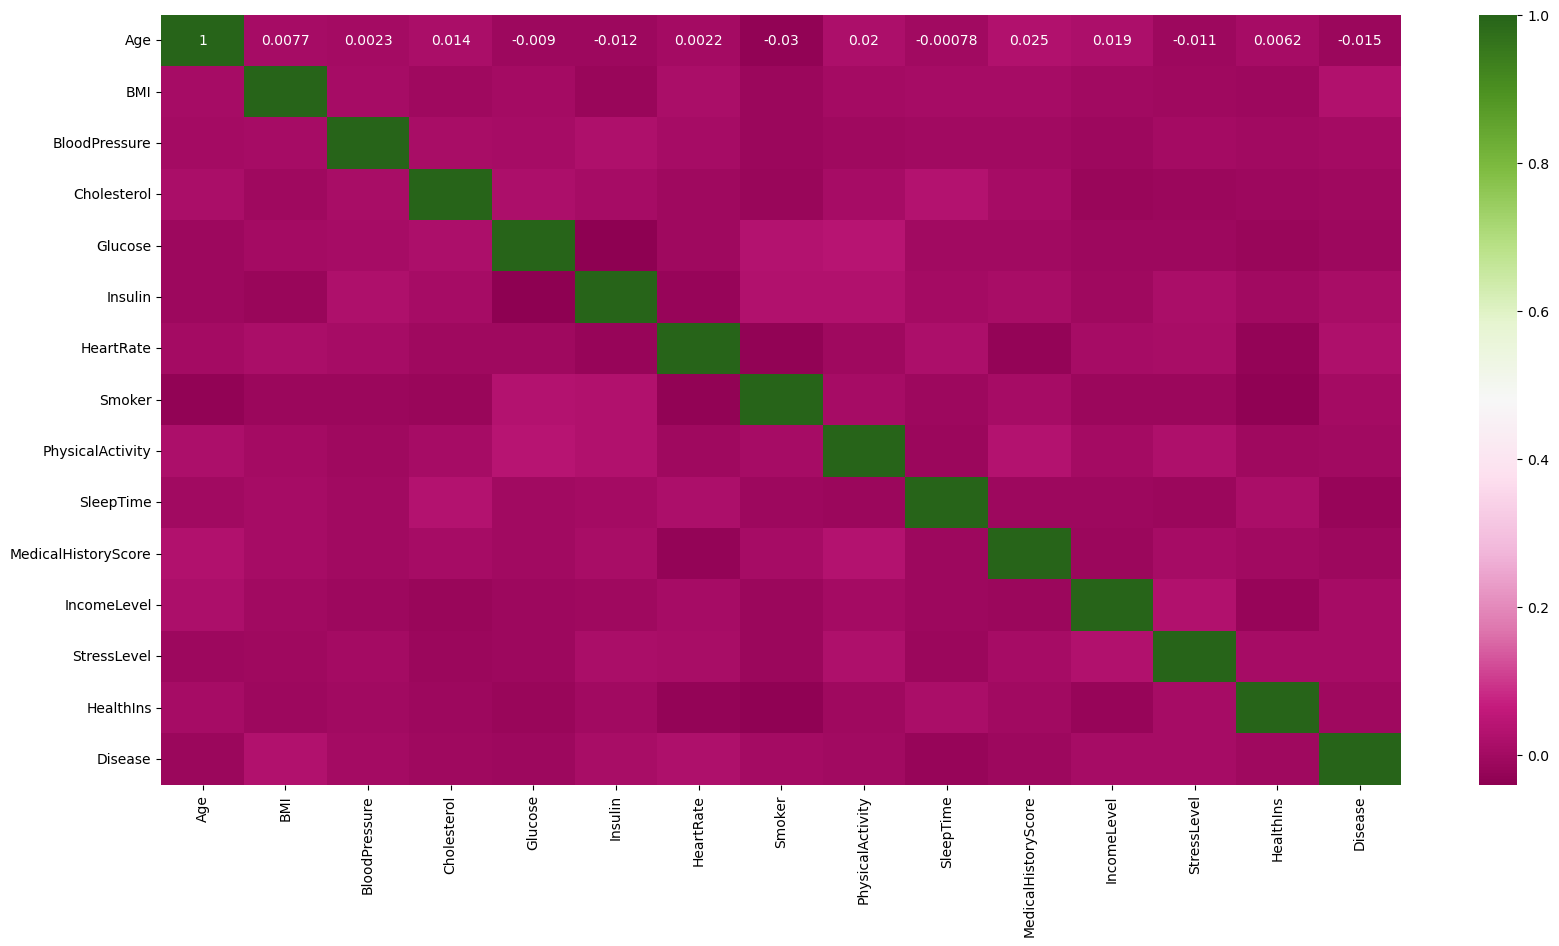

In [49]:
plt.figure(figsize=(20,10)) 
c= df.corr() 
sns.heatmap(c,cmap='PiYG',annot=True) 
c 

no hay ninguna relacion obvia con ningun valor

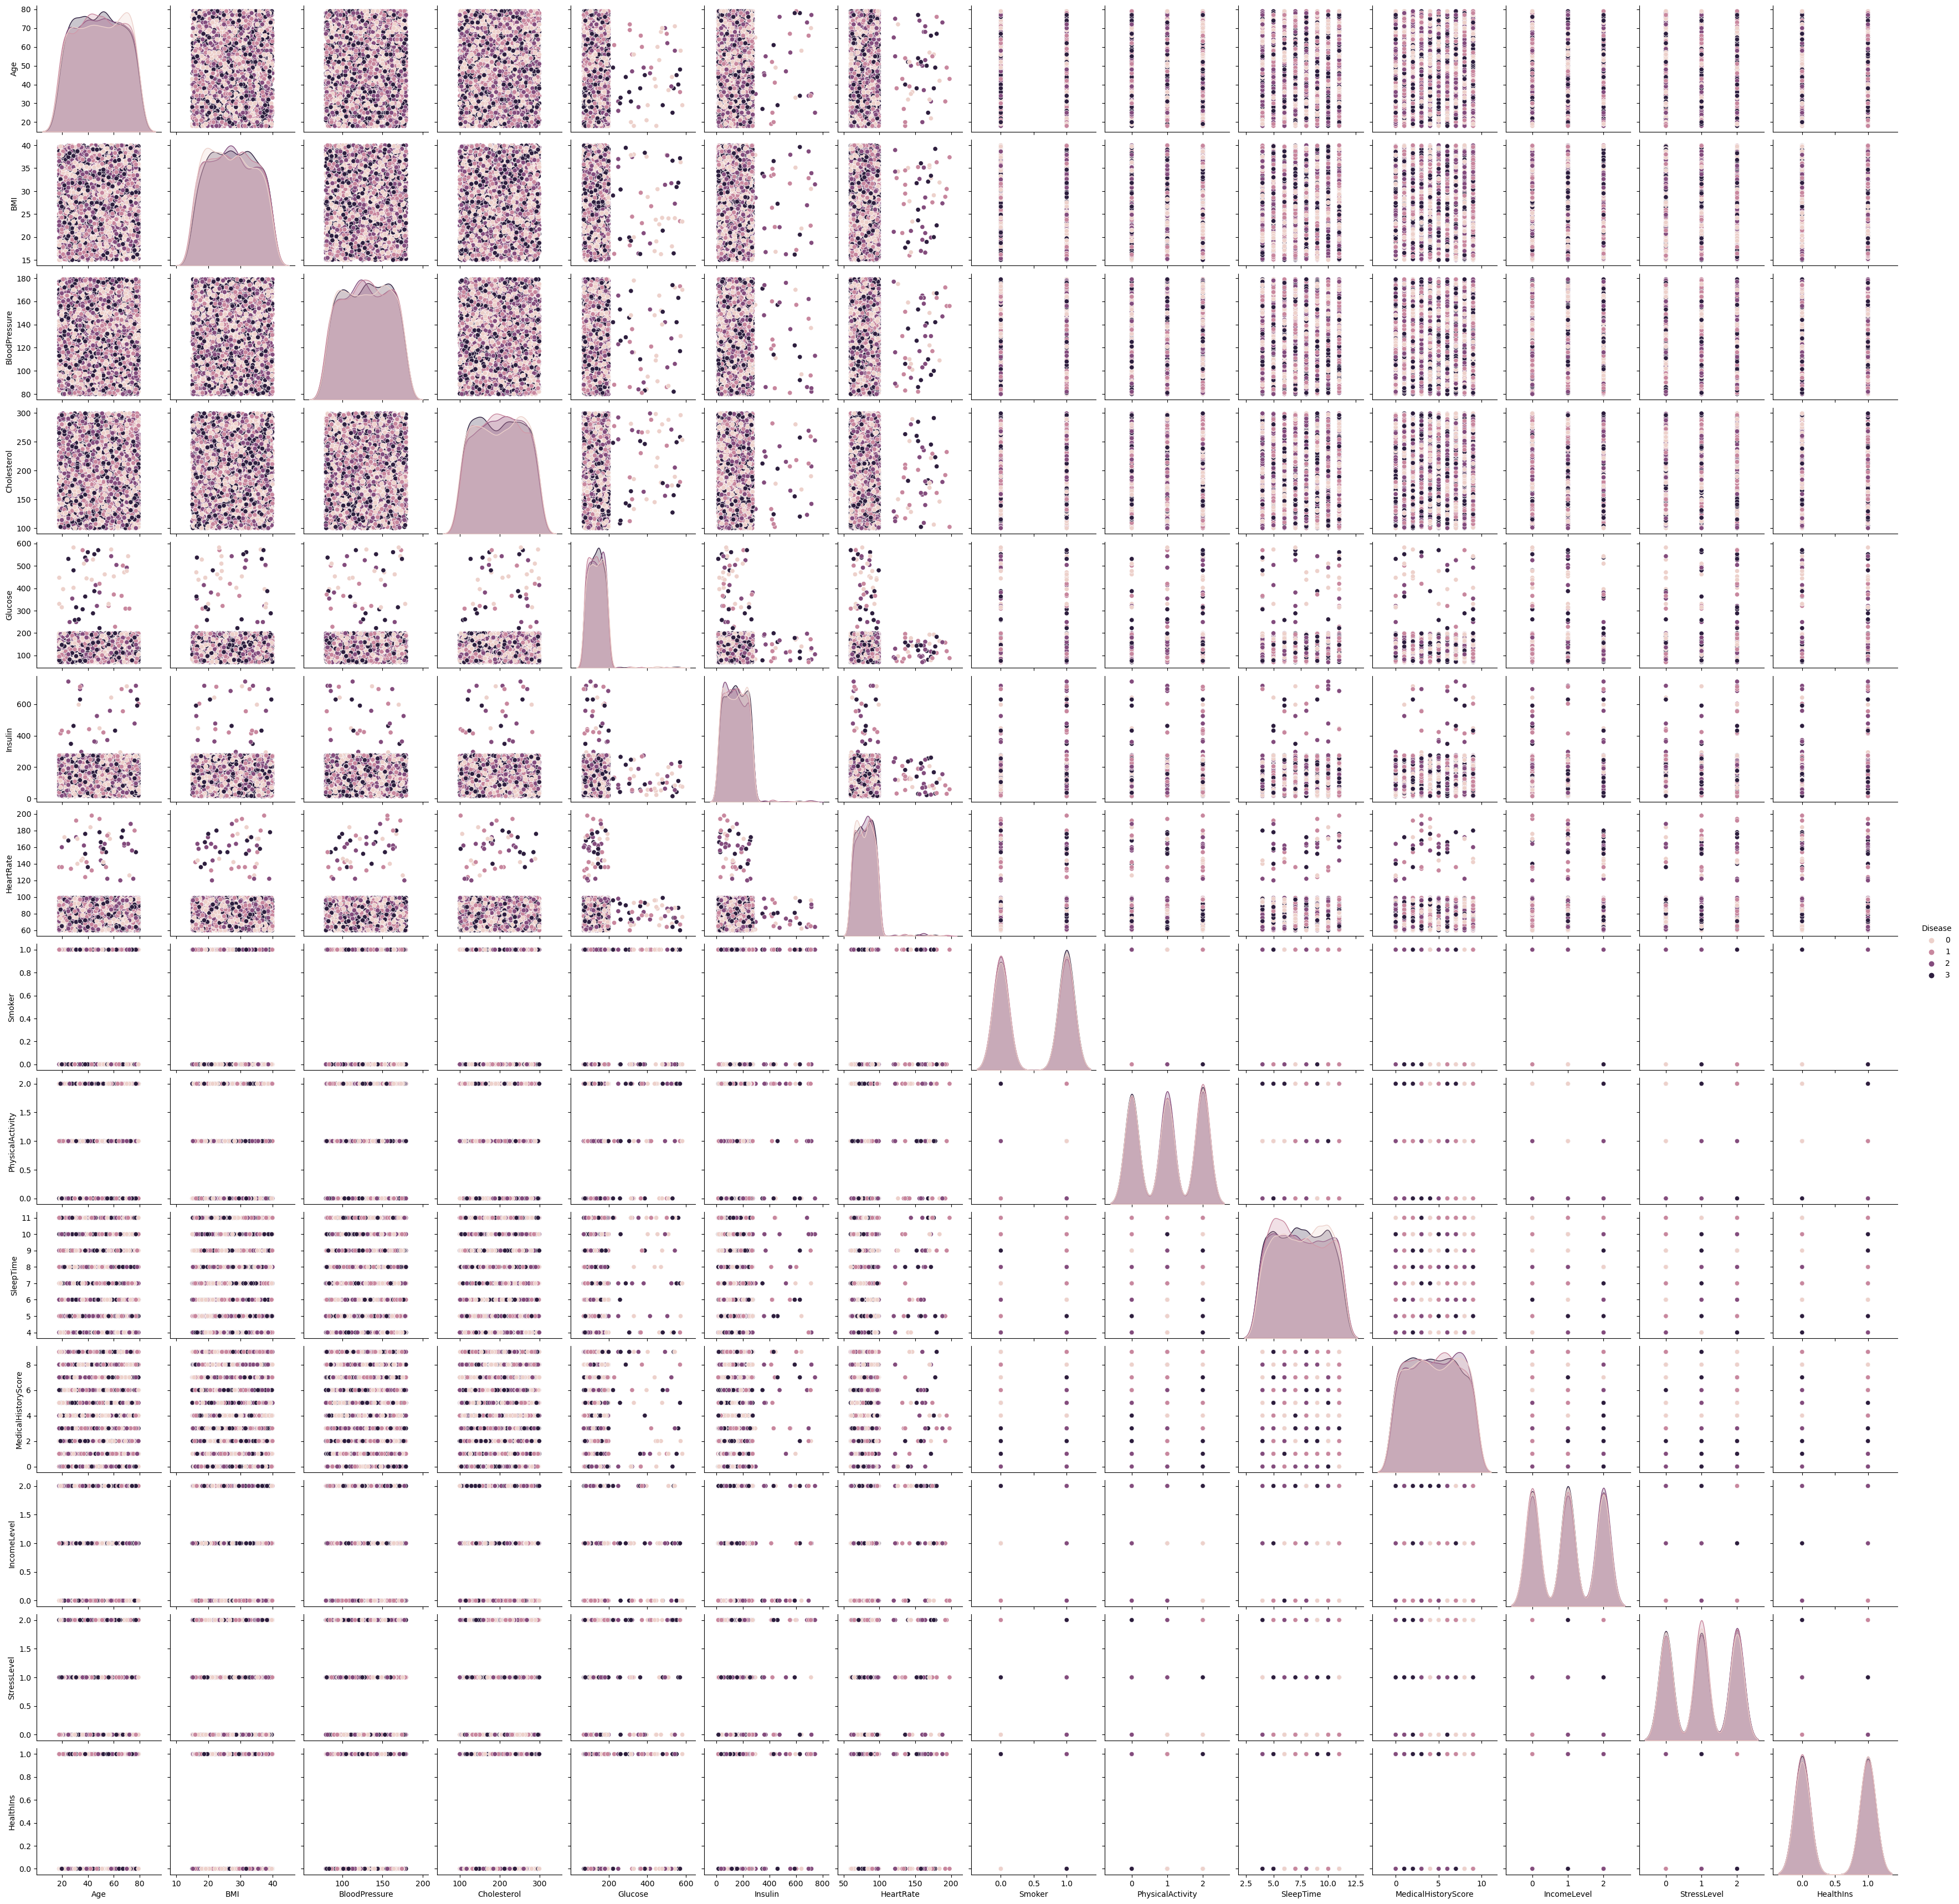

In [50]:
sns.pairplot(df,hue='Disease')

Detecting Outliers

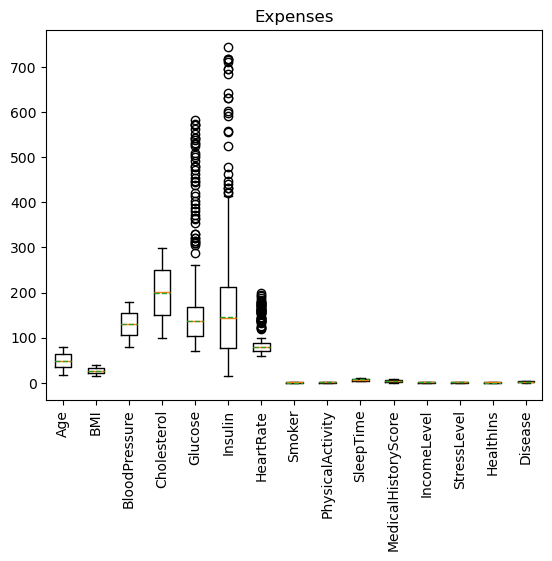

In [51]:
from matplotlib import pyplot
pyplot.boxplot(df,labels=df.columns,showmeans = True, meanline = True)
plt.xticks(rotation=90)
pyplot.title('Expenses')
pyplot.show()

In [52]:
df[["Glucose","Insulin","HeartRate"]].apply(pd.Series.describe)

Glucose      Insulin    HeartRate
count  5000.000000  5000.000000  5000.000000
mean    137.440600   146.573200    80.342000
std      47.448072    82.623127    13.914919
min      70.000000    15.000000    60.000000
25%     103.000000    78.000000    70.000000
50%     136.000000   144.000000    80.000000
75%     167.000000   213.000000    89.000000
max     582.000000   744.000000   198.000000

In [53]:
(df['Glucose'] > 200).sum() ##segun el diccionario solo deberia estar en un rango de 70 a 200

50

In [54]:
(df['Insulin'] > 276).sum()  #Range: 15 to 276.

32

In [55]:
(df['HeartRate'] > 100).sum() #Range: 60 to 100

50

In [56]:
fil=df.loc[(df['Glucose'] > 200) & (df['Insulin'] > 276) & (df['HeartRate'] > 100)]
fil  

Empty DataFrame
Columns: [Age, BMI, BloodPressure, Cholesterol, Glucose, Insulin, HeartRate, Smoker, PhysicalActivity, SleepTime, MedicalHistoryScore, IncomeLevel, StressLevel, HealthIns, Disease]
Index: []

In [57]:
##ningun paciente tiene las 3 cosas fuera del rango, ni tampoco al menos dos de ellas.

In [58]:
fil2=df.loc[(df['Glucose'] > 200) & (df['Insulin'] > 276)]
fil2 

Empty DataFrame
Columns: [Age, BMI, BloodPressure, Cholesterol, Glucose, Insulin, HeartRate, Smoker, PhysicalActivity, SleepTime, MedicalHistoryScore, IncomeLevel, StressLevel, HealthIns, Disease]
Index: []

In [59]:
fil3=df.loc[(df['Glucose'] > 200) & (df['HeartRate'] > 100)]
fil3 

Empty DataFrame
Columns: [Age, BMI, BloodPressure, Cholesterol, Glucose, Insulin, HeartRate, Smoker, PhysicalActivity, SleepTime, MedicalHistoryScore, IncomeLevel, StressLevel, HealthIns, Disease]
Index: []

In [60]:
fil3=df.loc[(df['Insulin'] > 276) & (df['HeartRate'] > 100)]
fil3 

Empty DataFrame
Columns: [Age, BMI, BloodPressure, Cholesterol, Glucose, Insulin, HeartRate, Smoker, PhysicalActivity, SleepTime, MedicalHistoryScore, IncomeLevel, StressLevel, HealthIns, Disease]
Index: []

observaremos si hay un patron en los outliers para ver si es posible eliminarlos

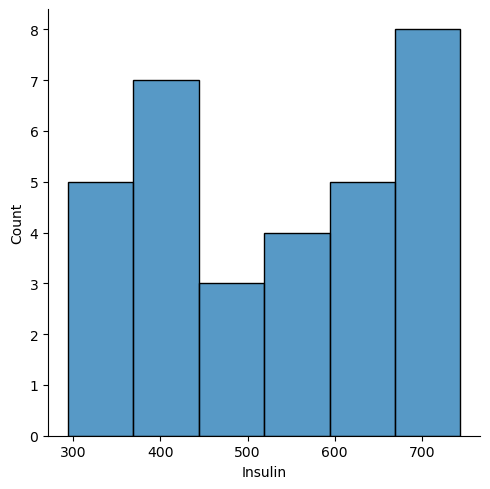

In [61]:
insu=df.loc[(df['Insulin'] > 276)]
sns.displot(data=insu, x="Insulin")

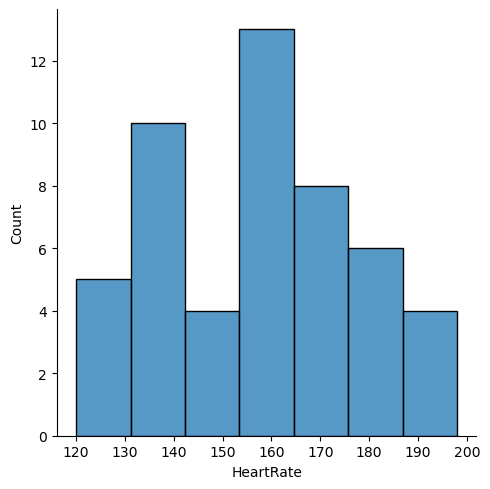

In [62]:
heart=df.loc[(df['HeartRate'] > 100)]
sns.displot(data=heart, x="HeartRate")

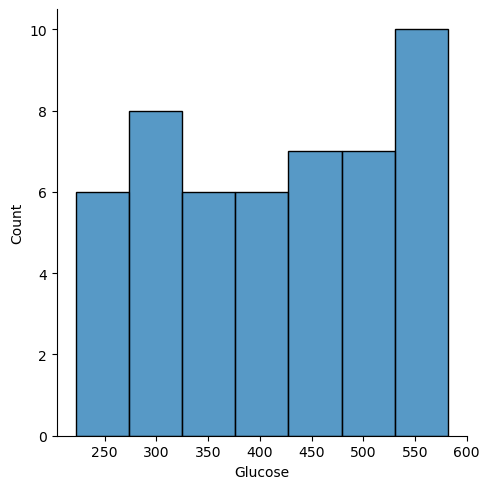

In [63]:
glu=df.loc[(df['Glucose'] > 200)]
sns.displot(data=glu, x="Glucose")

no hay un patron, por lo tanto los dejaremos para ver como se comporta nuestro modelo y si tenemos buenos resultados, de lo contrario los vamos a eliminar

escogeremos Disease como el valor objetivo porque queremos conocer si las demas variables predicen el tipo de enfermedad de los pacientes.

In [64]:
X = df.drop(columns="Disease")
y = df.Disease

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sca = StandardScaler()
X_PCA = sca.fit_transform(X)
X_PCA

array([[ 4.01805049e-01,  3.62047599e-02, -1.47453919e+00, ...,
        -1.22714116e+00, -1.27948108e-02, -1.00240289e+00],
       [ 1.12785109e+00, -1.53069796e-01, -1.47453919e+00, ...,
        -1.22714116e+00,  1.21747546e+00,  9.97602873e-01],
       [-1.56691905e-01,  3.27793799e-01,  7.84609348e-01, ...,
         1.22763211e+00,  1.21747546e+00, -1.00240289e+00],
       ...,
       [-4.49925146e-02,  7.49187700e-01,  4.66916585e-01, ...,
         1.22763211e+00, -1.24306508e+00,  9.97602873e-01],
       [-8.26888250e-01,  6.30420855e-01, -7.68555274e-01, ...,
         2.45477326e-04,  1.21747546e+00, -1.00240289e+00],
       [ 1.29540018e+00, -3.46833280e-01, -1.68633437e+00, ...,
         2.45477326e-04, -1.24306508e+00,  9.97602873e-01]])

In [66]:
pca = PCA(2)
projected = pca.fit_transform(X_PCA,y)

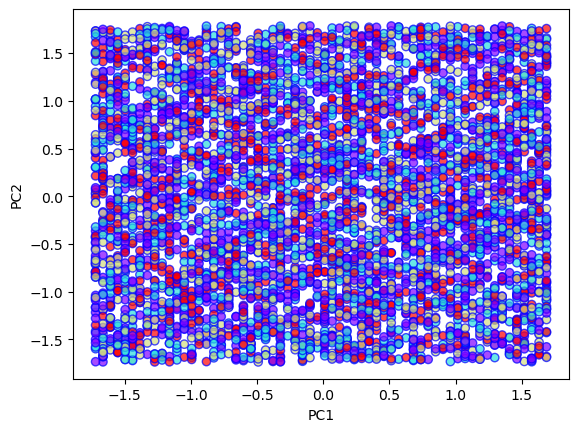

In [67]:
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.scatter(
X_PCA[:,0],
X_PCA[:,1],
c=y,
cmap="rainbow",
alpha=0.7,
edgecolors="b")

In [68]:
pca = PCA(10)
projected = pca.fit_transform(X_PCA,y)

In [69]:
pca2 = pd.DataFrame(projected, columns =['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'])
pca2.head()

C1        C2        C3        C4        C5        C6        C7  \
0 -0.153773 -0.705472  0.157254  0.000320 -0.629366 -0.105025 -0.533973   
1  1.113814 -0.673255  0.099929 -1.760768 -0.866871  1.080679  0.051083   
2 -0.384015 -1.576328 -1.191526  1.634944  1.163158 -0.914765 -0.528746   
3 -1.433084  1.141430 -0.398502  0.574873  0.569126  1.012162 -0.956380   
4 -0.119417  0.970622 -0.231518  1.597080 -0.363112  1.192113  0.355713   

         C8        C9       C10  
0 -1.623066  1.160551  0.679104  
1 -0.580353  0.115202 -0.854048  
2  0.036107 -0.070059 -0.125392  
3  0.054700 -1.633893  0.453176  
4 -0.127591  2.059077  0.003926

In [70]:
print(pca.explained_variance_ratio_)
expl_var = pca.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()), 
    columns=['PCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('PCA').mul(100).round(1)
print(df_expl_var)

[0.07810765 0.07635464 0.07597373 0.07570791 0.07352072 0.07225955
 0.07203965 0.07105849 0.06959196 0.06933097]
     Explained Variance (%)  Total Explained Variance (%)
PCA                                                      
1                       7.8                           7.8
2                       7.6                          15.4
3                       7.6                          23.0
4                       7.6                          30.6
5                       7.4                          38.0
6                       7.2                          45.2
7                       7.2                          52.4
8                       7.1                          59.5
9                       7.0                          66.5
10                      6.9                          73.4


con 10 componentes tenemos una variace del 73.4% lo cual no es buen resultado, ya que no tiene caso utilizar mas de 10 componentes si el dataset tiene 15 columnas.

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda =LinearDiscriminantAnalysis()
pro_lda = lda.fit_transform(X,y)

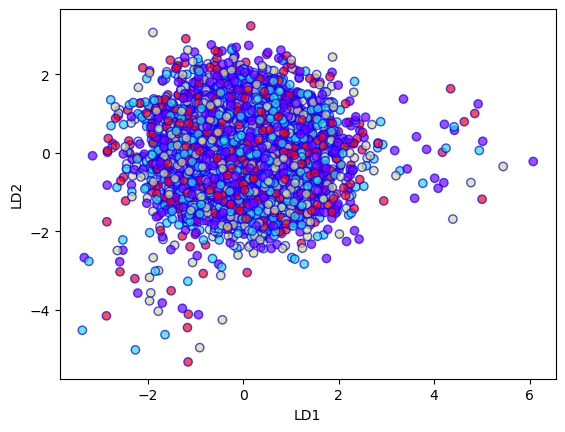

In [72]:
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.scatter(
pro_lda[:,0],
pro_lda[:,1],
c=y,
cmap="rainbow",
alpha=0.7,
edgecolors="b")

In [79]:
lda2 =LinearDiscriminantAnalysis(n_components=3)
pro_lda2 = lda2.fit_transform(X,y)

In [80]:
print(lda2.explained_variance_ratio_)
expl_var = lda2.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()), 
    columns=['LDA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('LDA').mul(100).round(1)
print(df_expl_var)

[0.58097213 0.25819172 0.16083615]
     Explained Variance (%)  Total Explained Variance (%)
LDA                                                      
1                      58.1                          58.1
2                      25.8                          83.9
3                      16.1                         100.0


In [83]:
Lda2 = pd.DataFrame(pro_lda2, columns =['C1', 'C2','C3'])
Lda2.head()

C1        C2        C3
0 -0.704393  0.574336 -1.641596
1  0.360943 -0.249292 -1.365106
2 -1.707099 -0.054698  0.894422
3 -0.478313  1.813923  0.435556
4  0.278053 -0.103445 -0.795418

In [84]:
x1=Lda2["C1"]
y1=Lda2["C2"]
z1=Lda2["C3"]

In [102]:
cm = plt.get_cmap("RdYlGn")
col = [cm(float(i) / 4999) for i in range(5000)]

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


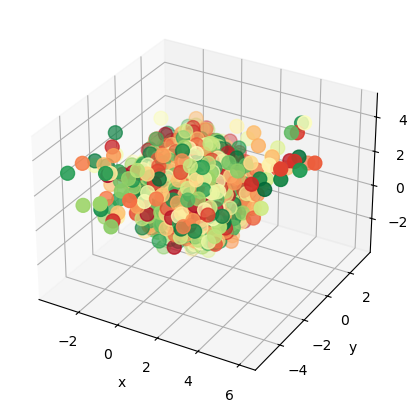

In [103]:
plt.figure(figsize=(6, 5))
axes = plt.axes(projection="3d")
print(type(axes))
axes.scatter3D(x1, y1, z1,s=100, c=col)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
plt.show()